In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt

import psycopg2 as pg
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [2]:
le = preprocessing.LabelEncoder()

In [3]:

# csv file path
df = "/Users/berelieta/Desktop/tesisEliu/Resources/BASEDEDATOSELIU.csv"

# Import csv file as a DataFrame
df = pd.read_csv(df,low_memory=False)
df.head()

,PACIENTE,EXPEDIENTE,GENERO,EDAD,ESCOLARIDAD,NIVEL SOCIOECONÓMICO,DIABETES,HAS,TABAQUISMO,DX ONCOLÓGICO,...,LINFOCITOS,PLAQUETAS,HEMOGLOBINA,VSG,PCR,DD,FIBRINÓGENO,ALBÚMINA,FERRITINA,SUPERVIVENCIA
0,1,42823,FEMENINO,75,PRIMARIA COMPLETA,1,NO,NO,NO,CÁNCER DE LARINGE,...,0.24,48,9.7,50,27.16,13330,713,3.1,NaN,10 DÍAS
1,2,183500,MASCULINO,68,LICENCIATURA INCOMPLETA,1,NO,SI,NO,CÁNCER DE PRÓSTATA,...,1.20,267,14.6,42,27.16,960,709,3.7,NaN,5 DÍAS
2,3,190045,MASCULINO,67,PREPARATORIA COMPLETA,1,NO,NO,SI,CÁNCER DE PULMON,...,0.60,33,13.9,42,16.51,26453,418,2.8,1473.0,4 DÍAS
3,4,190509,MASCULINO,67,PRIMARIA INCOMPLETA,2,NO,NO,SI,MESOTELIOMA EPITELOIDE,...,0.70,155,10.0,59,23.85,3580,640,2.5,NaN,15 DÍAS
4,5,192004,FEMENINO,71,PRIMARIA COMPLETA,1,SI,NO,NO,MIELOMA MÚLTIPLE,...,0.60,110,9.5,59,23.85,3580,640,2.5,NaN,15 DÍAS


In [4]:
dfcovid = df

# GÉNERO

In [5]:
gender_df =dfcovid.groupby(["GENERO"]).size().reset_index(name='NUM')
gender_df


,GENERO,NUM
0,FEMENINO,13
1,MASCULINO,17


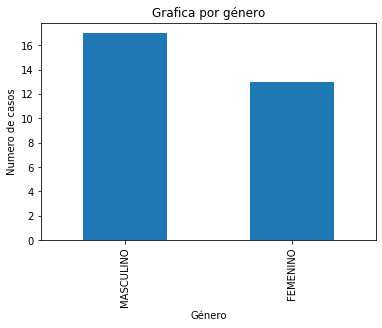

In [6]:
a = dfcovid["GENERO"].value_counts()
%matplotlib inline
a.plot(kind='bar')

plt.xlabel("Género")
plt.ylabel("Numero de casos")
plt.title("Grafica por género")

#Save image
#plt.savefig("Resources/IMG/gender.png")
plt.show()

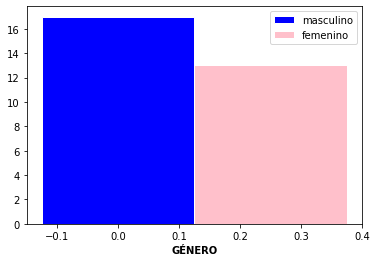

In [7]:
#arrays
dataGender = gender_df["GENERO"].to_list()

# set width of bar
barWidth = 0.25
 
# set height of bar
males = gender_df[gender_df.GENERO == 'MASCULINO']
bars1 = males['NUM'].to_list()

females = gender_df[gender_df.GENERO == 'FEMENINO']
bars2 = females['NUM'].to_list()
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='masculino')
plt.bar(r2, bars2, color='pink', width=barWidth, edgecolor='white', label='femenino')
 
# Add xticks on the middle of the group bars


plt.xlabel('GÉNERO', fontweight='bold')
#plt.xticks([r + barWidth for r in range(len(bars1))], dataGender)

#Save image
plt.savefig("Resources/IMG/Gender.png")
 
# Create legend & Show graphic
plt.legend()
plt.show()

# EDAD

In [8]:
age_df =dfcovid.groupby(["EDAD"]).size().reset_index(name='NUM')
age_df


,EDAD,NUM
0,63,1
1,64,1
2,65,3
3,66,1
4,67,4
5,68,2
6,69,3
7,71,3
8,72,2
9,73,2


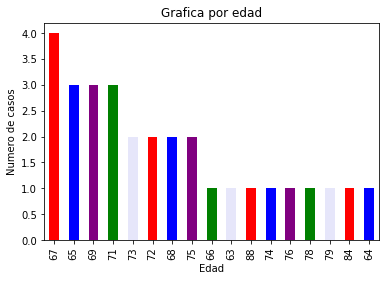

In [49]:
a = dfcovid["EDAD"].value_counts()
%matplotlib inline

a.plot(kind='bar',color =['red', 'blue', 'purple', 'green', 'lavender'] )

plt.xlabel("Edad")
plt.ylabel("Numero de casos")
plt.title("Grafica por edad")

#Save image
#plt.savefig("Resources/IMG/Age.png")
plt.show()

# ESCOLARIDAD

In [10]:
escolaridad_df =dfcovid.groupby(["ESCOLARIDAD"]).size().reset_index(name='CONTEO')
escolaridad_df

,ESCOLARIDAD,CONTEO
0,ANALFABETA,1
1,BACHILLERATO TÉCNICO,1
2,LICENCIATURA COMPLETA,2
3,LICENCIATURA INCOMPLETA,1
4,POSGRADO,1
5,PREPARATORIA COMPLETA,3
6,PRIMARIA COMPLETA,8
7,PRIMARIA INCOMPLETA,9
8,SECUNDARIA COMPLETA,4


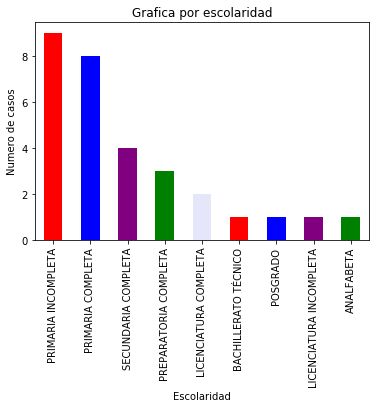

In [50]:
a = dfcovid["ESCOLARIDAD"].value_counts()
%matplotlib inline
a.plot(kind='bar', color =['red', 'blue', 'purple', 'green', 'lavender'] )

plt.xlabel("Escolaridad")
plt.ylabel("Numero de casos")
plt.title("Grafica por escolaridad")

#Save image
plt.savefig("Resources/IMG/escolaridad.png")
plt.show()

In [12]:
dfcovid.head()

,PACIENTE,EXPEDIENTE,GENERO,EDAD,ESCOLARIDAD,NIVEL SOCIOECONÓMICO,DIABETES,HAS,TABAQUISMO,DX ONCOLÓGICO,...,LINFOCITOS,PLAQUETAS,HEMOGLOBINA,VSG,PCR,DD,FIBRINÓGENO,ALBÚMINA,FERRITINA,SUPERVIVENCIA
0,1,42823,FEMENINO,75,PRIMARIA COMPLETA,1,NO,NO,NO,CÁNCER DE LARINGE,...,0.24,48,9.7,50,27.16,13330,713,3.1,NaN,10 DÍAS
1,2,183500,MASCULINO,68,LICENCIATURA INCOMPLETA,1,NO,SI,NO,CÁNCER DE PRÓSTATA,...,1.20,267,14.6,42,27.16,960,709,3.7,NaN,5 DÍAS
2,3,190045,MASCULINO,67,PREPARATORIA COMPLETA,1,NO,NO,SI,CÁNCER DE PULMON,...,0.60,33,13.9,42,16.51,26453,418,2.8,1473.0,4 DÍAS
3,4,190509,MASCULINO,67,PRIMARIA INCOMPLETA,2,NO,NO,SI,MESOTELIOMA EPITELOIDE,...,0.70,155,10.0,59,23.85,3580,640,2.5,NaN,15 DÍAS
4,5,192004,FEMENINO,71,PRIMARIA COMPLETA,1,SI,NO,NO,MIELOMA MÚLTIPLE,...,0.60,110,9.5,59,23.85,3580,640,2.5,NaN,15 DÍAS


# PIE VISUALIZATIONS

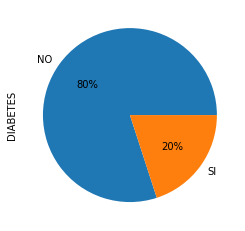

In [13]:
#Diabetes
diabetes = dfcovid["DIABETES"].value_counts().plot(kind='pie', autopct='%1.0f%%')

#Save image
plt.savefig("Resources/IMG/Diabetes.png")

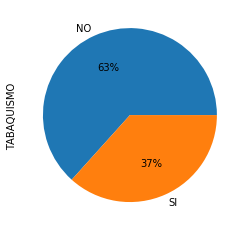

In [14]:
#Tabaquismo
tabaquismo = dfcovid["TABAQUISMO"].value_counts().plot(kind='pie', autopct='%1.0f%%')

#Save image
plt.savefig("Resources/IMG/Tabaquismo.png")

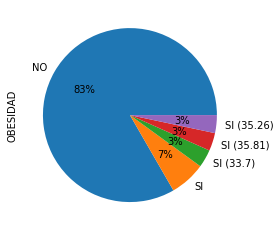

In [15]:
#Obesidad
obesidad = dfcovid["OBESIDAD"].value_counts().plot(kind='pie', autopct='%1.0f%%')

#Save image
plt.savefig("Resources/IMG/Obesidad.png")

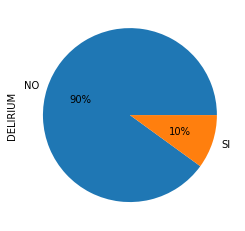

In [16]:
#Delirium
delirium = dfcovid["DELIRIUM"].value_counts().plot(kind='pie', autopct='%1.0f%%')

#Save image
plt.savefig("Resources/IMG/Delirium.png")

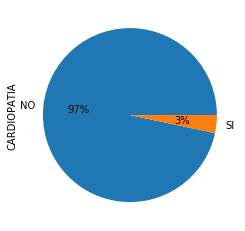

In [17]:
#Cardiopatia
cardiopatia = dfcovid["CARDIOPATIA"].value_counts().plot(kind='pie', autopct='%1.0f%%')

#Save image
plt.savefig("Resources/IMG/Cardiopatia.png")

# SUPERVIVENCIA

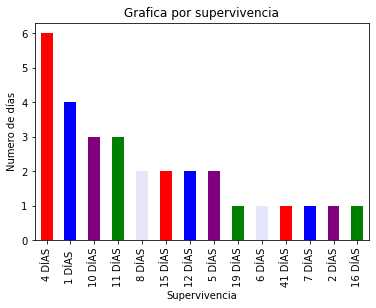

In [51]:
a = dfcovid["SUPERVIVENCIA"].value_counts()
%matplotlib inline
a.plot(kind='bar', color =['red', 'blue', 'purple', 'green', 'lavender'] )

plt.xlabel("Supervivencia")
plt.ylabel("Numero de días")
plt.title("Grafica por supervivencia")

#Save image
plt.savefig("Resources/IMG/Supervivencia.png")
plt.show()

/Users/berelieta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/berelieta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, '')

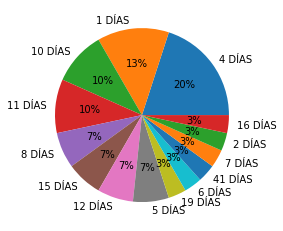

In [28]:
#Supervivencia
supervivencia = dfcovid["SUPERVIVENCIA"].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.axes().set_xlabel('')
plt.axes().set_ylabel('')

#plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Save image
#plt.savefig("Resources/IMG/Supervivencia2.png")

# MACHINE LEARNING

In [54]:
# csv file path
covid_df = "/Users/berelieta/Desktop/tesisEliu/Resources/testBere.csv"

# Import csv file as a DataFrame
covid_df = pd.read_csv(covid_df,low_memory=False)
covid_df.head()

,PACIENTE,DIAGNOSIS,NIVEL SOCIOECONÓMICO,DIABETES,HAS,TABAQUISMO,KAR0FSKY,DET. COGNITIVO,POLIFARMACIA,OBE1DAD,...,LINFOCITOS,PLAQUETAS,HEMOGLOBINA,VSG,PCR,DD,FIBRINÓGE0,ALBÚMINA,FERRITINA,SUPERVIVENCIA
0,1,Malignant,1,0,0,0,100,0,0,0.00,...,0.24,48,9.7,50,27.16,13330,713,3.1,0.0,10
1,2,Benign,1,0,1,0,100,0,0,35.81,...,1.20,267,14.6,42,27.16,960,709,3.7,0.0,5
2,3,Malignant,1,0,0,1,50,1,0,0.00,...,0.60,33,13.9,42,16.51,26453,418,2.8,1473.0,4
3,4,Malignant,2,0,0,1,80,0,0,0.00,...,0.70,155,10.0,59,23.85,3580,640,2.5,0.0,15
4,5,Malignant,1,1,0,0,80,0,0,0.00,...,0.60,110,9.5,59,23.85,3580,640,2.5,0.0,15


In [55]:
X = covid_df.drop("DIAGNOSIS", axis=1)
y = covid_df["DIAGNOSIS"]
print(X.shape, y.shape)

(30, 26) (30,)


# Logistic Regression

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [57]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
classifier.fit(X_train, y_train)

/Users/berelieta/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9090909090909091
Testing Data Score: 0.75


In [60]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Benign' 'Malignant' 'Benign' 'Malignant' 'Benign' 'Benign' 'Benign'
 'Malignant']
First 10 Actual labels: ['Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign', 'Malignant']


In [61]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Benign,Benign
1,Malignant,Benign
2,Benign,Benign
3,Malignant,Benign
4,Benign,Benign
5,Benign,Benign
6,Benign,Benign
7,Malignant,Malignant


# KNN

In [62]:
covid_df.head()

,PACIENTE,DIAGNOSIS,NIVEL SOCIOECONÓMICO,DIABETES,HAS,TABAQUISMO,KAR0FSKY,DET. COGNITIVO,POLIFARMACIA,OBE1DAD,...,LINFOCITOS,PLAQUETAS,HEMOGLOBINA,VSG,PCR,DD,FIBRINÓGE0,ALBÚMINA,FERRITINA,SUPERVIVENCIA
0,1,Malignant,1,0,0,0,100,0,0,0.00,...,0.24,48,9.7,50,27.16,13330,713,3.1,0.0,10
1,2,Benign,1,0,1,0,100,0,0,35.81,...,1.20,267,14.6,42,27.16,960,709,3.7,0.0,5
2,3,Malignant,1,0,0,1,50,1,0,0.00,...,0.60,33,13.9,42,16.51,26453,418,2.8,1473.0,4
3,4,Malignant,2,0,0,1,80,0,0,0.00,...,0.70,155,10.0,59,23.85,3580,640,2.5,0.0,15
4,5,Malignant,1,1,0,0,80,0,0,0.00,...,0.60,110,9.5,59,23.85,3580,640,2.5,0.0,15


In [63]:
y = covid_df["DIAGNOSIS"]

In [64]:
X_df = covid_df.drop("DIAGNOSIS", axis =1)
X = X_df.drop("PACIENTE", axis =1)

X.head()

,NIVEL SOCIOECONÓMICO,DIABETES,HAS,TABAQUISMO,KAR0FSKY,DET. COGNITIVO,POLIFARMACIA,OBE1DAD,OBE1DAD.1,DELIRIUM,...,LINFOCITOS,PLAQUETAS,HEMOGLOBINA,VSG,PCR,DD,FIBRINÓGE0,ALBÚMINA,FERRITINA,SUPERVIVENCIA
0,1,0,0,0,100,0,0,0.00,0,0,...,0.24,48,9.7,50,27.16,13330,713,3.1,0.0,10
1,1,0,1,0,100,0,0,35.81,1,0,...,1.20,267,14.6,42,27.16,960,709,3.7,0.0,5
2,1,0,0,1,50,1,0,0.00,0,1,...,0.60,33,13.9,42,16.51,26453,418,2.8,1473.0,4
3,2,0,0,1,80,0,0,0.00,0,0,...,0.70,155,10.0,59,23.85,3580,640,2.5,0.0,15
4,1,1,0,0,80,0,0,0.00,0,0,...,0.60,110,9.5,59,23.85,3580,640,2.5,0.0,15


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


k: 1, Train/Test Score: 1.000/0.750
k: 3, Train/Test Score: 0.909/0.625
k: 5, Train/Test Score: 0.818/0.500
k: 7, Train/Test Score: 0.818/0.500
k: 9, Train/Test Score: 0.636/0.625
k: 11, Train/Test Score: 0.636/0.625
k: 13, Train/Test Score: 0.682/0.625
k: 15, Train/Test Score: 0.682/0.625
k: 17, Train/Test Score: 0.727/0.750
k: 19, Train/Test Score: 0.545/0.500


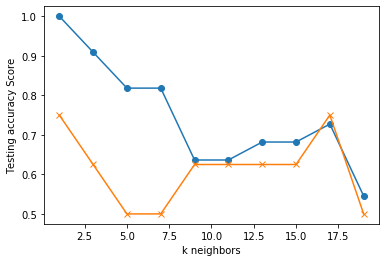

In [66]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [67]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.625


# Random Forrest

In [68]:
covid_df.head()

,PACIENTE,DIAGNOSIS,NIVEL SOCIOECONÓMICO,DIABETES,HAS,TABAQUISMO,KAR0FSKY,DET. COGNITIVO,POLIFARMACIA,OBE1DAD,...,LINFOCITOS,PLAQUETAS,HEMOGLOBINA,VSG,PCR,DD,FIBRINÓGE0,ALBÚMINA,FERRITINA,SUPERVIVENCIA
0,1,Malignant,1,0,0,0,100,0,0,0.00,...,0.24,48,9.7,50,27.16,13330,713,3.1,0.0,10
1,2,Benign,1,0,1,0,100,0,0,35.81,...,1.20,267,14.6,42,27.16,960,709,3.7,0.0,5
2,3,Malignant,1,0,0,1,50,1,0,0.00,...,0.60,33,13.9,42,16.51,26453,418,2.8,1473.0,4
3,4,Malignant,2,0,0,1,80,0,0,0.00,...,0.70,155,10.0,59,23.85,3580,640,2.5,0.0,15
4,5,Malignant,1,1,0,0,80,0,0,0.00,...,0.60,110,9.5,59,23.85,3580,640,2.5,0.0,15


In [69]:
feature_names = X.columns
target_names = ["negative", "positive"]

In [70]:

from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)

In [71]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_test)
encoded_y_test = label_encoder.transform(y_test)

In [72]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

Using TensorFlow backend.


In [73]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train_categorical)
clf.score(X_test, y_test_categorical)

0.375

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train_categorical)
rf.score(X_test, y_test_categorical)

0.75

In [75]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.1575341067649357, 'DD'),
 (0.10884846854324523, 'ALBÚMINA'),
 (0.1010943825423597, 'FIBRINÓGE0'),
 (0.0959228881960475, 'HEMOGLOBINA'),
 (0.06858106461661168, 'VSG'),
 (0.06245374303342568, 'SUPERVIVENCIA'),
 (0.05737948176284242, 'PLAQUETAS'),
 (0.05340698189223783, 'PCR'),
 (0.0414215465045581, 'KAR0FSKY'),
 (0.04133054957915291, 'FERRITINA'),
 (0.03938114081101752, 'LINFOCITOS'),
 (0.03724170907115125, 'LEUCOCITOS'),
 (0.031705995096371044, 'NIVEL SOCIOECONÓMICO'),
 (0.018688075603908297, 'ENF ONC AVANZADA'),
 (0.016777157027959167, 'FRAGILIDAD'),
 (0.01459660315175021, 'HAS'),
 (0.011781715707538077, 'DELIRIUM'),
 (0.011242099908998377, 'DIABETES'),
 (0.009396497118865539, 'DET. COGNITIVO'),
 (0.007323621809923377, 'OBE1DAD'),
 (0.004517215219421103, 'TABAQUISMO'),
 (0.0036077876984126987, 'ERC'),
 (0.003437424149924149, 'OBE1DAD.1'),
 (0.0011972789115646258, 'CARDIOPATIA'),
 (0.0011324652777777778, 'POLIFARMACIA')]

In [76]:
#Build lists for mean and SEM Value for radius and permiter values
#Radius (Mean)
radius_means = covid_df.loc[:, ['DIABETES']]
radius_means = radius_means['DIABETES']

#Perimeter (Worst)
perimeter_means = covid_df.loc[:, ['CARDIOPATIA']]
perimeter_means = perimeter_means['CARDIOPATIA']

No handles with labels found to put in legend.


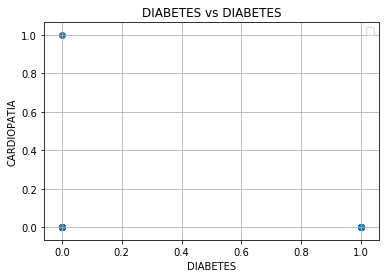

In [79]:
# Generate the Plot (with Error Bars)
#Min/Max values for volume to determine limits on plot chart
min_volume = covid_df.min()['DIABETES']
max_volume = covid_df.max()['DIABETES']
max_yvolume = covid_df.max()['CARDIOPATIA']

#create additional white space on plot chart
min_volume = min_volume - 1
max_volume = max_volume + 1
max_yvolume = max_yvolume + 2
#Limits, background grid, title, labels
plt.grid(True)

plt.ylabel("CARDIOPATIA")
plt.xlabel("DIABETES")
plt.title("DIABETES vs DIABETES")
plt.scatter(radius_means, perimeter_means)
plt.legend(frameon=True)
plt.show()

# SVM

In [80]:
covid_df.head()

,PACIENTE,DIAGNOSIS,NIVEL SOCIOECONÓMICO,DIABETES,HAS,TABAQUISMO,KAR0FSKY,DET. COGNITIVO,POLIFARMACIA,OBE1DAD,...,LINFOCITOS,PLAQUETAS,HEMOGLOBINA,VSG,PCR,DD,FIBRINÓGE0,ALBÚMINA,FERRITINA,SUPERVIVENCIA
0,1,Malignant,1,0,0,0,100,0,0,0.00,...,0.24,48,9.7,50,27.16,13330,713,3.1,0.0,10
1,2,Benign,1,0,1,0,100,0,0,35.81,...,1.20,267,14.6,42,27.16,960,709,3.7,0.0,5
2,3,Malignant,1,0,0,1,50,1,0,0.00,...,0.60,33,13.9,42,16.51,26453,418,2.8,1473.0,4
3,4,Malignant,2,0,0,1,80,0,0,0.00,...,0.70,155,10.0,59,23.85,3580,640,2.5,0.0,15
4,5,Malignant,1,1,0,0,80,0,0,0.00,...,0.60,110,9.5,59,23.85,3580,640,2.5,0.0,15


In [81]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [82]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.250


In [83]:

# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.50      0.33      0.40         6
    positive       0.00      0.00      0.00         2

    accuracy                           0.25         8
   macro avg       0.25      0.17      0.20         8
weighted avg       0.38      0.25      0.30         8



# GridSearch

In [84]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')

In [85]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [86]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.600, total=   0.8s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.800, total=   0.9s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=1.000, total=   0.9s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.750, total=   1.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.750, total=   1.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.600, total=   0.8s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.800, total=   0.9s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=1.000, total=   0.7s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.750, total=   1.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   39.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [87]:

# List the best parameters for this dataset
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001}


In [88]:

# List the best score
print(grid.best_score_)

0.78


In [89]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [90]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.50      0.33      0.40         6
         red       0.00      0.00      0.00         2

    accuracy                           0.25         8
   macro avg       0.25      0.17      0.20         8
weighted avg       0.38      0.25      0.30         8



# NN

In [91]:
covid_df.head()

,PACIENTE,DIAGNOSIS,NIVEL SOCIOECONÓMICO,DIABETES,HAS,TABAQUISMO,KAR0FSKY,DET. COGNITIVO,POLIFARMACIA,OBE1DAD,...,LINFOCITOS,PLAQUETAS,HEMOGLOBINA,VSG,PCR,DD,FIBRINÓGE0,ALBÚMINA,FERRITINA,SUPERVIVENCIA
0,1,Malignant,1,0,0,0,100,0,0,0.00,...,0.24,48,9.7,50,27.16,13330,713,3.1,0.0,10
1,2,Benign,1,0,1,0,100,0,0,35.81,...,1.20,267,14.6,42,27.16,960,709,3.7,0.0,5
2,3,Malignant,1,0,0,1,50,1,0,0.00,...,0.60,33,13.9,42,16.51,26453,418,2.8,1473.0,4
3,4,Malignant,2,0,0,1,80,0,0,0.00,...,0.70,155,10.0,59,23.85,3580,640,2.5,0.0,15
4,5,Malignant,1,1,0,0,80,0,0,0.00,...,0.60,110,9.5,59,23.85,3580,640,2.5,0.0,15


In [92]:
# Step 0: Reformat data
data = covid_df.values
X = data[:, 2:35]
y = data[:, 1]

In [93]:

from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)

In [94]:

from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_test)
encoded_y_test = label_encoder.transform(y_test)

In [95]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [96]:

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [97]:
print(X_train.shape)

(22, 25)


In [98]:

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [99]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [100]:
from tensorflow.keras.layers import Dense
number_inputs = 30
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [101]:

number_classes = 2
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=number_classes, activation='softmax'))

In [102]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 124       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 14        
Total params: 210
Trainable params: 210
Non-trainable params: 0
_________________________________________________________________


In [103]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [104]:
print(X_train_scaled.shape)
print(y_train_categorical.shape)

(22, 25)
(22, 2)


In [111]:
# Fit (train) the model
# model.fit(X_train_scaled,y_train_categorical,epochs=50,shuffle=True,verbose=50)

In [ ]:

# Evaluate the model using the testing data
# model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")